# GPyOpt: parallel Bayesian optimization

### Written by Javier Gonzalez, University of Sheffield.

*Last updated Tuesday, 15 March 2016.*

In this noteboook we are going to learn how to use GPyOpt to run parallel BO methods. The goal of these approaches is to make use of all the computational power or our machine to perform the optimization. For instance, if we hace a computer with 4 cores, we may want to make 4 evaluations of $f$ in parallel everytime we test the performance of the algorithm. 

In this notebook we will use the **Local Penalization** method describe in the paper *Batch Bayesian Optimization via Local Penalization*.

In [1]:
from IPython.display import HTML 
HTML('<iframe src=http://arxiv.org/pdf/1505.08052v4.pdf width=700 height=550></iframe>')

In [2]:
%pylab inline  
import GPyOpt

Populating the interactive namespace from numpy and matplotlib


/Users/gojav/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


warning in stationary: failed to import cython module: falling back to numpy
warning in stationary: failed to import cython module: falling back to numpy


As in previous examples we use a synthetic objective function but you can think about doing the same with any function you like. In this case, we use the Branin function. For the optimization we will perturb the evaluations with Gaussian noise with sd = 0.1.

In [3]:
# --- Objective function
objective_true  = GPyOpt.objective_examples.experiments2d.branin()                 # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(sd = 0.1)         # noisy version
bounds = objective_noisy.bounds        

In [4]:
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}, ## use default bounds
          {'name': 'var_2', 'type': 'continuous', 'domain': bounds[1]}]

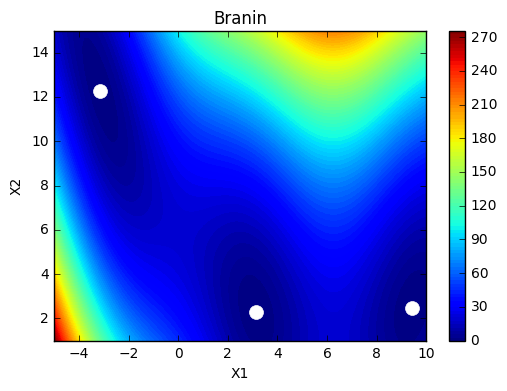

In [5]:
objective_true.plot()

As in previous cases, we create a GPyOpt object with the desing space and fucntion to optimize. In this case we need to select the evaluator type, which in this case is the *local penalization method* the batch size and the number of cores that we want to use. The evaluation of the function will be splitted accross the available cores.

In [6]:
batch_size = 4
num_cores = 4

In [7]:
from numpy.random import seed
seed(123)
BO_demo_parallel = GPyOpt.methods.BayesianOptimization(f=objective_noisy.f,  
                                            domain = domain,                  
                                            acquisition_type = 'EI',              
                                            normalize_Y = True,
                                            initial_design_numdata = 10,
                                            evaluator_type = 'local_penalization',
                                            batch_size = batch_size,
                                            num_cores = num_cores,
                                            acquisition_jitter = 0)    

We will optimize this function by running 10 parallel evaluations in 3 cores of our machine. 

In [8]:
# --- Run the optimization for 10 iterations
max_iter = 10                                        
BO_demo_parallel.run_optimization(max_iter)

We plot the resutls. Observe that the final number of evaluations that we will make is $10*4=40$. 

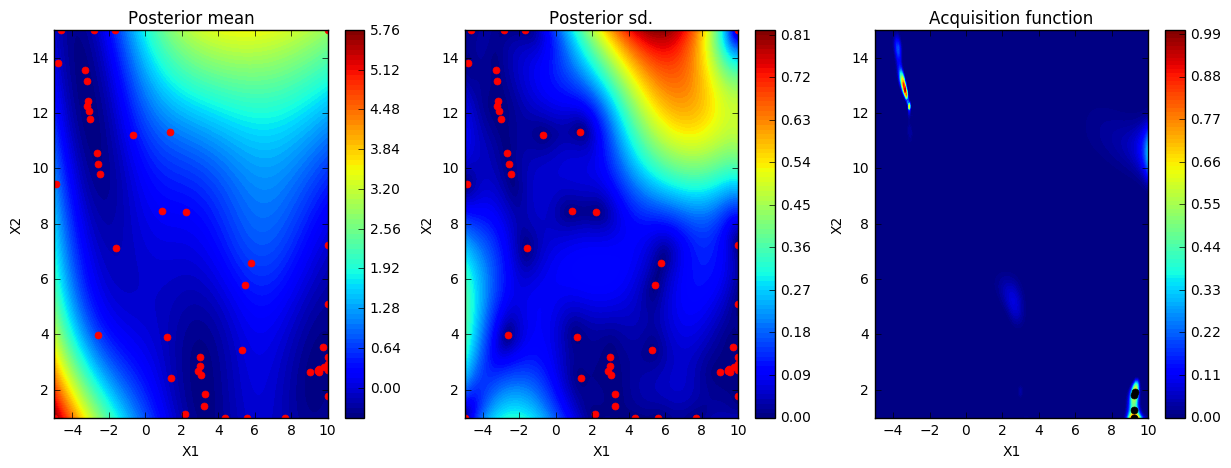

In [9]:
BO_demo_parallel.plot_acquisition()

See how the method explores the space using the four parallel evaluations of $f$ and it is able to identify the location of the three minima. 

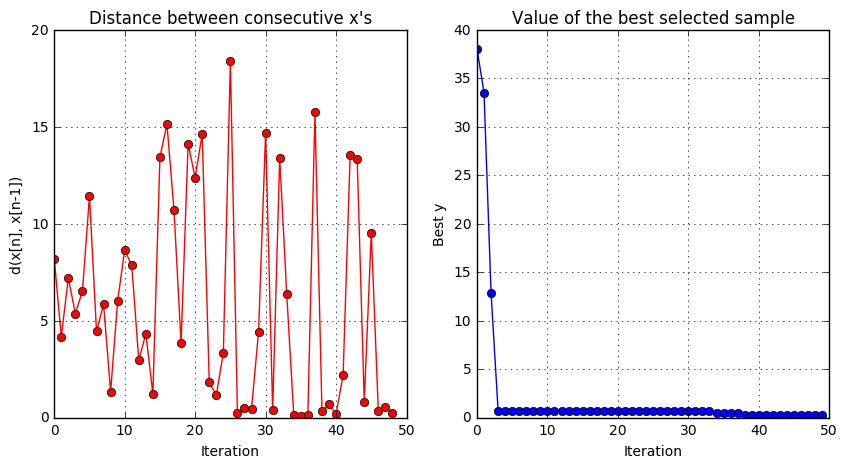

In [10]:
BO_demo_parallel.plot_convergence()